<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-08-28 12:06:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100% 73.5K=0.3s

2022-08-28 12:06:11 (73.5 KB/s) - 'loan_train.csv' saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [12]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [15]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

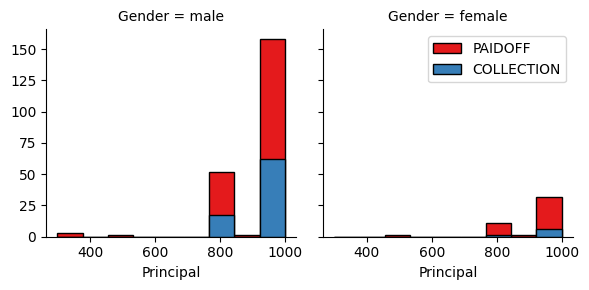

In [16]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

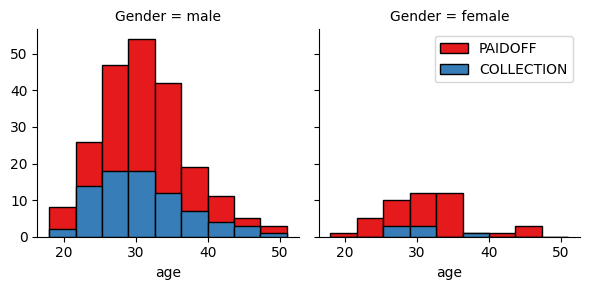

In [17]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


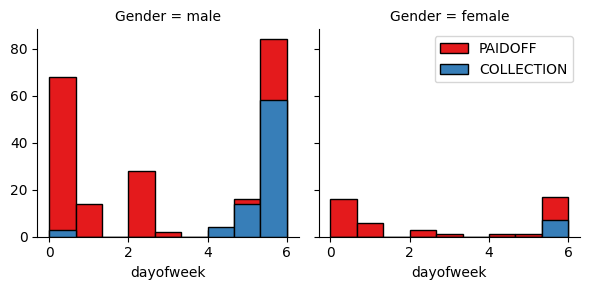

In [18]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [19]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [21]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [22]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [23]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [24]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [25]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [26]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [27]:
y = df['loan_status'].values
y[0:5]
 

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [49]:
# splitting tarin_loan to test and train set
# X_loan_train,X_loan_test
# Y_loan_train,Y_loan_test
X_loan_train,X_loan_test,Y_loan_train,Y_loan_test = train_test_split(X,y,test_size = 0.3,random_state=6)
print("X_loan_train : ",X_loan_train.shape,"X_loan_test : ",X_loan_test.shape)
print("Y_loan_train : ",Y_loan_train.shape,"Y_loan_test : ",Y_loan_test.shape)

X_loan_train :  (242, 8) X_loan_test :  (104, 8)
Y_loan_train :  (242,) Y_loan_test :  (104,)


In [50]:
# N- number of samples in train set
N=X_loan_train.shape[0]

#values to store accuracy
f1score_val = np.zeros((N-1))
jaccard_val = np.zeros((N-1))
# Finding best K value by selsectibg random range
for k_val in range(1,N):
    kNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k_val).fit(X_loan_train,Y_loan_train)
    # storing predicted data to loan_pred
    loan_pred = kNN.predict(X_loan_test)
    f1score_val[k_val-1] = f1_score(Y_loan_test,loan_pred,average='weighted')
    
print("k_val :",f1score_val.argmax()+1,"f1score accuracy : ",f1score_val.max())

# setting best K value
best_k = f1score_val.argmax()+1
print("best K : ",best_k)

k_val : 6 f1score accuracy :  0.7814258911819887
best K :  6


In [51]:
# X_loan_train,X_loan_test
# Y_loan_train,Y_loan_test
kNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors = best_k).fit(X_loan_train,Y_loan_train)
# storing predicted data to loan_pred
loan_pred = kNN.predict(X_loan_test)
f1score_val = f1_score(Y_loan_test,loan_pred,average='weighted')
jaccard_val = jaccard_score(Y_loan_test,loan_pred,pos_label='PAIDOFF')
print("kNN_f1score_val :",f1score_val)
print("kNN_jaccard_val :",jaccard_val)

kNN_f1score_val : 0.7814258911819887
kNN_jaccard_val : 0.7634408602150538


# Decision Tree


In [52]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# X_loan_train,X_loan_test
# Y_loan_train,Y_loan_test
# loan_tree is the instance of decision tree
# Modeling
loan_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6).fit(X_loan_train,Y_loan_train)
# presicted values  --> loan_Tree_pred
loan_Tree_pred = loan_Tree.predict(X_loan_test)

# acuuracy calculation
DS_Tree_f1score_val = f1_score(Y_loan_test,loan_Tree_pred,average='weighted')
DS_Tree_jaccard_val = jaccard_score(Y_loan_test,loan_Tree_pred,pos_label='PAIDOFF')
print("DS_Tree_f1score_val :",DS_Tree_f1score_val)
print("DS_Tree_jaccard_val :",DS_Tree_jaccard_val)

DS_Tree_f1score_val : 0.707842176557051
DS_Tree_jaccard_val : 0.6702127659574468


# Support Vector Machine


In [53]:
from sklearn import svm
# X_loan_train,X_loan_test
# Y_loan_train,Y_loan_test

# Modeling
svm_loan = svm.SVC(kernel = 'rbf').fit(X_loan_train,Y_loan_train)
svm_loan_pred = svm_loan.predict(X_loan_test)

In [54]:
# accuracy 
svm_f1_score = f1_score(Y_loan_test,svm_loan_pred,average='weighted')
svm_jaccard_score = jaccard_score(Y_loan_test,svm_loan_pred,pos_label='PAIDOFF')

print("svm_f1_score : ",svm_f1_score)
print("svm_jaccard_score : ",svm_jaccard_score)

svm_f1_score :  0.669116666419691
svm_jaccard_score :  0.7378640776699029


# Logistic Regression


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Modeling
LR_loan = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_loan_train,Y_loan_train)
LR_loan_pred = LR_loan.predict(X_loan_test)

#predict prob
LR_loan_pred_prob = LR_loan.predict_proba(X_loan_test)

In [56]:
# accuracy 
LR_f1_score = f1_score(Y_loan_test,LR_loan_pred,average='weighted')
LR_jaccard_score = jaccard_score(Y_loan_test,LR_loan_pred,pos_label='PAIDOFF')
LR_log_loss = log_loss(Y_loan_test,LR_loan_pred_prob)

print("LR_f1_score : ",LR_f1_score)
print("LR_jaccard_score : ",LR_jaccard_score)
print("LR_log_loss : ",LR_log_loss)
print(classification_report(Y_loan_test,LR_loan_pred))

LR_f1_score :  0.7723443223443223
LR_jaccard_score :  0.7684210526315789
LR_log_loss :  0.5717906379421169
              precision    recall  f1-score   support

  COLLECTION       0.56      0.38      0.45        24
     PAIDOFF       0.83      0.91      0.87        80

    accuracy                           0.79       104
   macro avg       0.70      0.64      0.66       104
weighted avg       0.77      0.79      0.77       104



In [57]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_loan_test, LR_loan_pred, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)
print(cnf_matrix)


[[73  7]
 [15  9]]


# Model Evaluation using Test set


In [58]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [59]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-08-28 12:23:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

     0K ...                                                   100% 1.47G=0s

2022-08-28 12:23:17 (1.47 GB/s) - 'loan_test.csv' saved [3642/3642]



### Load Test set for evaluation


In [60]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

# Convert to date time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
print(test_df.shape)

# Pre-processing: Feature selection/extraction
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
print(Feature.head())

test_X = Feature
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)

#test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
test_y = test_df['loan_status'].values

print("X_loan_train : ",X.shape,"X_loan_test : ",test_X.shape)
print("Y_loan_train : ",y.shape,"Y_loan_test : ",test_y.shape)


(54, 10)
   Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   50       1        0         1                     0   
1        300      7   35       0        1         0                     0   
2       1000     30   43       1        1         0                     1   
3       1000     30   26       0        1         0                     0   
4        800     15   29       0        1         1                     0   

   college  
0        0  
1        0  
2        0  
3        1  
4        0  
X_loan_train :  (346, 8) X_loan_test :  (54, 8)
Y_loan_train :  (346,) Y_loan_test :  (54,)


In [61]:
# KNN
# predicting test_y using trained kNN instance 
KNN_loan_pred = kNN.predict(test_X)
KNN_f1score_val = f1_score(test_y,KNN_loan_pred,average='weighted')
KNN_jaccard_val= jaccard_score(test_y,KNN_loan_pred,pos_label='PAIDOFF')
print("KNN_f1score_val :",KNN_f1score_val)
print("KNN_jaccard_val :",KNN_jaccard_val)

KNN_f1score_val : 0.7252534070517485
KNN_jaccard_val : 0.6808510638297872


DS_Tree_f1score_val : 0.7937814357567445
DS_Tree_jaccard_val : 0.7608695652173914


[Text(0.34523809523809523, 0.9285714285714286, 'X[4] <= -0.188\nentropy = 0.821\nsamples = 242\nvalue = [62, 180]'),
 Text(0.09523809523809523, 0.7857142857142857, 'X[7] <= 0.14\nentropy = 0.202\nsamples = 95\nvalue = [3, 92]'),
 Text(0.047619047619047616, 0.6428571428571429, 'entropy = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.14285714285714285, 0.6428571428571429, 'X[2] <= -0.902\nentropy = 0.391\nsamples = 39\nvalue = [3, 36]'),
 Text(0.09523809523809523, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.19047619047619047, 0.5, 'X[2] <= -0.736\nentropy = 0.439\nsamples = 33\nvalue = [3, 30]'),
 Text(0.14285714285714285, 0.35714285714285715, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.23809523809523808, 0.35714285714285715, 'X[2] <= 1.171\nentropy = 0.345\nsamples = 31\nvalue = [2, 29]'),
 Text(0.14285714285714285, 0.21428571428571427, 'X[2] <= -0.404\nentropy = 0.242\nsamples = 25\nvalue = [1, 24]'),
 Text(0.09523809523809523, 0.07142857142857142, 'entropy =

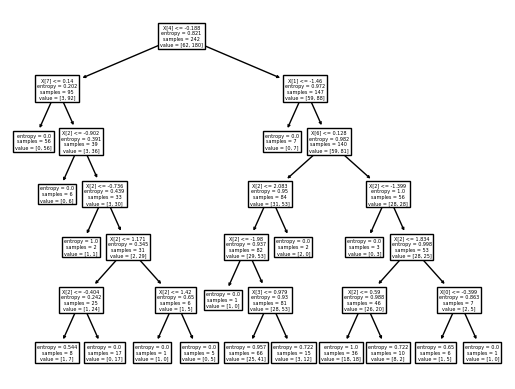

In [62]:
# DecisionTree
# predicting test_y using trained loan_Tree instance 
loan_Tree_pred = loan_Tree.predict(test_X)
DS_Tree_f1score_val = f1_score(test_y,loan_Tree_pred,average='weighted')
DS_Tree_jaccard_val = jaccard_score(test_y,loan_Tree_pred,pos_label='PAIDOFF')
print("DS_Tree_f1score_val :",DS_Tree_f1score_val)
print("DS_Tree_jaccard_val :",DS_Tree_jaccard_val)
tree.plot_tree(loan_Tree)

In [63]:
# SVM
# predicting test_y using trained svm_loan instance
svm_loan_pred = svm_loan.predict(test_X)
# accuracy 
svm_f1_score = f1_score(test_y,svm_loan_pred,average='weighted')
svm_jaccard_score = jaccard_score(test_y,svm_loan_pred,pos_label='PAIDOFF')

print("svm_f1_score : ",svm_f1_score)
print("svm_jaccard_score : ",svm_jaccard_score)



svm_f1_score :  0.683127572016461
svm_jaccard_score :  0.7307692307692307


In [64]:
# Logistic regression
from sklearn.metrics import log_loss

# predicting test_y using trained LR_loan instance
LR_loan_pred = LR_loan.predict(test_X)

#predict prob
LR_loan_pred_prob = LR_loan.predict_proba(test_X)

LR_f1_score = f1_score(test_y,LR_loan_pred,average='weighted')
LR_jaccard_score = jaccard_score(test_y,LR_loan_pred,pos_label='PAIDOFF')
LR_log_loss = log_loss(test_y,LR_loan_pred_prob)

# accuracy 
print("LR_f1_score : ",LR_f1_score)
print("LR_jaccard_score : ",LR_jaccard_score)
print("LR_log_loss : ",LR_log_loss)
print("\n\n",classification_report(test_y,LR_loan_pred))

LR_f1_score :  0.7427039191745074
LR_jaccard_score :  0.7843137254901961
LR_log_loss :  0.5772635746354248


               precision    recall  f1-score   support

  COLLECTION       1.00      0.21      0.35        14
     PAIDOFF       0.78      1.00      0.88        40

    accuracy                           0.80        54
   macro avg       0.89      0.61      0.62        54
weighted avg       0.84      0.80      0.74        54



In [65]:
# Final Report 
report  = {'Algorithm'       : ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],
           'Jaccard_results' : [KNN_jaccard_val, DS_Tree_jaccard_val, svm_f1_score, LR_f1_score],
           'F1_score_result' : [KNN_f1score_val, DS_Tree_f1score_val, svm_jaccard_score, LR_jaccard_score],
           'LogLoss_result'  : ['NA','NA','NA',LR_log_loss]}

print(pd.DataFrame(report, columns= ['Algorithm','Jaccard_results','F1_score_result','LogLoss_result']))



            Algorithm  Jaccard_results  F1_score_result LogLoss_result
0                 KNN         0.680851         0.725253             NA
1       Decision Tree         0.760870         0.793781             NA
2                 SVM         0.683128         0.730769             NA
3  LogisticRegression         0.742704         0.784314       0.577264


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.680851| 0.725253 | NA      |
| Decision Tree      | 0.760870| 0.793781 | NA      |
| SVM                | 0.683128| 0.730769 | NA      |
| LogisticRegression | 0.742704| 0.784314 | 0.577264|



<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
